## Import & Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

df = pd.read_csv("train.csv")
dft = pd.read_csv("test.csv")

## EDA pre-Feature Engineering

In [ ]:
#Pengaturan Tampilan Data
pd.set_option('display.max_columns', None)
df.describe(include='all')

In [ ]:
#Cek Data yang Kosong
pd.set_option('display.max_rows', None)
print(df.isnull().sum())


In [ ]:
#Reset Pengaturan Tampilan Data
pd.reset_option('display.max_rows')

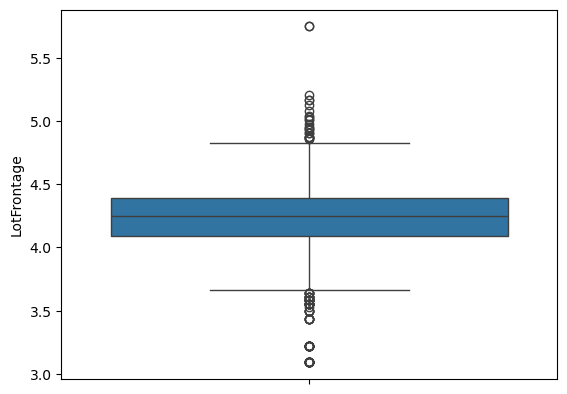

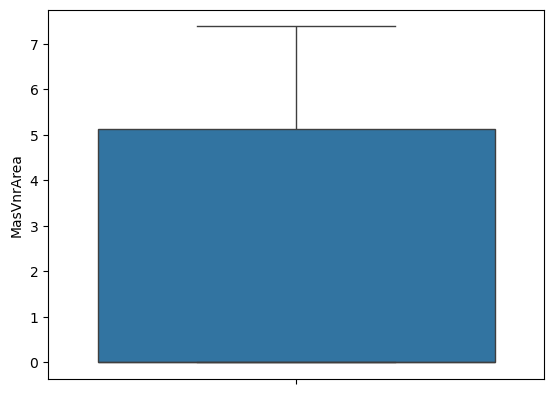

In [14]:
#Visualisasi Outlier (LotFrontage, MasVnrArea)
sns.boxplot(y='LotFrontage', data=df)
plt.show()
sns.boxplot(y='MasVnrArea', data=df)
plt.show()

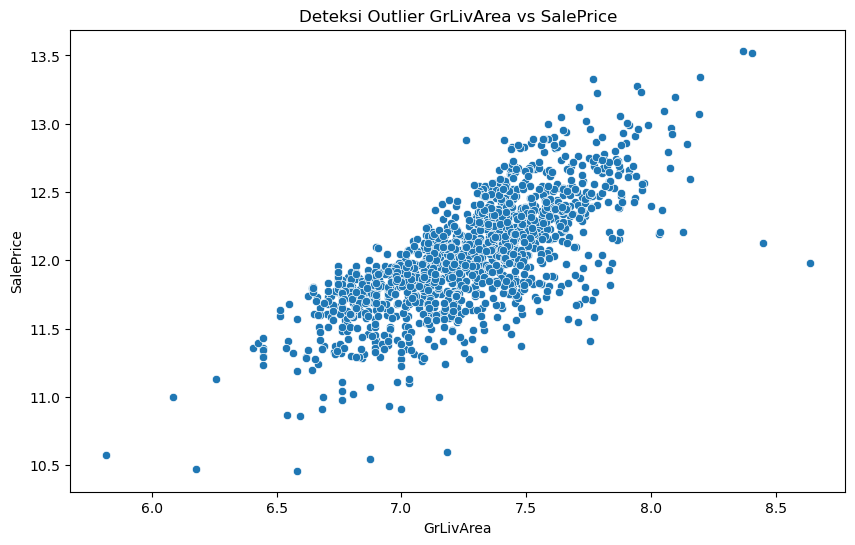

In [13]:
#Visualisasi Outlier (GrLivArea vs SalePrice)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Deteksi Outlier GrLivArea vs SalePrice')
plt.show()

## Hapus Data Ga Guna

In [ ]:
df.drop(columns=['Alley', 'Fence'], inplace=True)

## Pengisian Data yang Kosong

In [ ]:
#isi dengan modus
cols_fillna_modus = ['MasVnrType', 'Electrical', 'MSZoning']
for col in cols_fillna_modus:
    df[col].fillna(df[col].mode()[0], inplace=True)
    dft[col].fillna(df[col].mode()[0], inplace=True)

#isi dengan median
median_masvnrarea = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(median_masvnrarea)
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(median_masvnrarea)

#isi dengan none
cols_fill_none = [
    'PoolQC', 'GarageQual', 'GarageCond', 'GarageType',
    'GarageFinish', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'MiscFeature', 'FireplaceQu'
]
df[cols_fill_none] = df[cols_fill_none].fillna('None')
dft[cols_fill_none] = dft[cols_fill_none].fillna('None')

#isi dengan 0
cols_fill_0 = ['GarageYrBlt', 'GarageArea', 'PoolArea','MasVnrType', 'MasVnrArea']
df[cols_fill_0] = df[cols_fill_0].fillna('0')
dft[cols_fill_0] = dft[cols_fill_0].fillna('0')

#isi dengan median pergrup
LotFrontage_median = df.groupby('Neighborhood')['LotFrontage'].median()
df['LotFrontage'] = df['LotFrontage'].fillna(df['Neighborhood'].map(LotFrontage_median))
dft['LotFrontage'] = dft['LotFrontage'].fillna(df['Neighborhodod'].map(LotFrontage_median))




## Encoding

In [ ]:
#Ordinal
qual_cond_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0 
}
qual_cond_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
]
for col in qual_cond_cols:
    df[col] = df[col].map(qual_cond_map)
    dft[col] = dft[col].map(qual_cond_map)

bsmt_exp_map = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'None': 0
}
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exp_map)
dft['BsmtExposure'] = dft['BsmtExposure'].map(bsmt_exp_map)

bsmt_fin_map = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'None': 0
}
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_map)
dft['BsmtFinType1'] = dft['BsmtFinType1'].map(bsmt_fin_map)
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmt_fin_map)
dft['BsmtFinType2'] = dft['BsmtFinType2'].map(bsmt_fin_map)

garage_fin_map = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'None': 0
}
df['GarageFinish'] = df['GarageFinish'].map(garage_fin_map)
dft['GarageFinish'] = dft['GarageFinish'].map(garage_fin_map)

lotshape_fin_map = {
    'IR3' : 0,
    'IR2' : 1,
    'IR1' : 2,
    'Reg' : 3
}
df['LotShape'] = df['LotShape'].map(lotshape_fin_map)
dft['LotShape'] = dft['LotShape'].map(lotshape_fin_map)

landslope_fin_map = {
    'Gtl' : 2,
    'Mod' : 1,
    'Sev' : 0
}
df['LandSlope'] = df['LandSlope'].map(landslope_fin_map)
dft['LandSlope'] = dft['LandSlope'].map(landslope_fin_map)

utilities_map = {
    'AllPub': 3,
    'NoSewr': 2,
    'NoSeWa': 1,
    'ELO': 0
}
df['Utilities'] = df['Utilities'].map(utilities_map)
dft['Utilities'] = dft['Utilities'].map(utilities_map)

paveddrive_map = {
    'Y': 2,
    'P': 1,
    'N': 0
}
df['PavedDrive'] = df['PavedDrive'].map(paveddrive_map)
dft['PavedDrive'] = dft['PavedDrive'].map(paveddrive_map)

functional_map = {
    'Typ': 7,
    'Min1': 6,
    'Min2': 5,
    'Mod': 4,
    'Maj1': 3,
    'Maj2': 2,
    'Sev': 1, 
    'Sal': 0
}
df['Functional'] = df['Functional'].map(functional_map)
dft['Functional'] = dft['Functional'].map(functional_map)

fence_map = {
    'GdPrv': 4,
    'MnPrv': 3,
    'GdWo': 2,
    'MnWw': 1,
    0: 0
}
df['Fence'] = df['Fence'].fillna(0)
dft['Fence'] = dft['Fence'].fillna(0)
df['Fence'] = df['Fence'].map(fence_map)
dft['Fence'] = dft['Fence'].map(fence_map)



In [ ]:
#Categorical
nominal_cols = [
    'MSZoning', 'Alley', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
]
df = pd.get_dummies(df, columns=nominal_cols)
dft = pd.get_dummies(dft, columns=nominal_cols)

## EDA

In [ ]:
# HeatMap
df_num = df.select_dtypes(include=['int64', 'float64'])
corr = df_num.corr()
plt.figure(figsize=(21, 22))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
#Visualisasi Hubungan GarageCars, GarageArea, dan SalePrice dalam Scatterplot Matrix.
sns.pairplot(df[['GarageCars', 'GarageArea', 'SalePrice']], hue='SalePrice',palette="viridis")
plt.show()

## Transformasi dan Scaling

In [ ]:
#Log Transform SalePrice
df['SalePrice'] = np.log1p(df['SalePrice'])

#Ambil semua kolom numerik dan log yang skewed
numeric_cols = df.select_dtypes(include = [np.number]).columns
numeric_cols = numeric_cols.drop(['Id', 'SalePrice'])
skewed_feats = df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewness fitur numerik:")
print(skewed_feats)
skewness_threshold = 0.75
highly_skewed_cols = skewed_feats[abs(skewed_feats) > skewness_threshold].index
print(f"Menerapkan log-transform ke {len(highly_skewed_cols)} fitur...")
for col in highly_skewed_cols:
    df[col] = np.log1p(df[col])
    dft[col] = np.log1p(dft[col])

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
dft[numeric_cols] = scaler.transform(dft[numeric_cols])

